<a href="https://colab.research.google.com/github/lihui1625/machineLearning/blob/main/SK_02_01_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn
import numpy as np
from scipy import sparse
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import mglearn


X.shape: (26, 2)


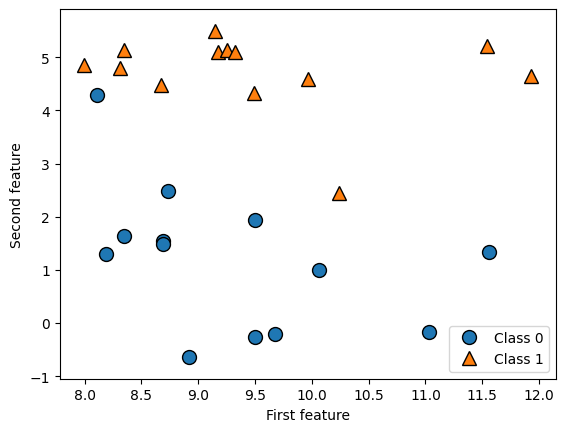

In [13]:
X, y = mglearn.datasets.make_forge()

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:", X.shape)


Text(0, 0.5, 'Target')

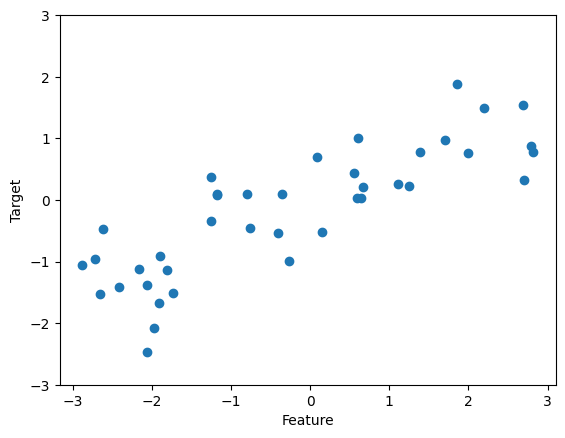

In [14]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [15]:
from numpy.lib.function_base import bincount
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer keys:", cancer.keys())
print("cancer data shape:", cancer.data.shape)
print("sample counts per classes:", {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})
print("cancer feature_names:", cancer.feature_names)


cancer keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
cancer data shape: (569, 30)
sample counts per classes: {'malignant': 212, 'benign': 357}
cancer feature_names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [16]:
import pandas as pd
import numpy as np

boston = mglearn.datasets.load_boston()
print("boston shape:", boston.data.shape)

X,y = mglearn.datasets.load_extended_boston()
print("X shape:",X.shape)


boston shape: (506, 13)
X shape: (506, 104)


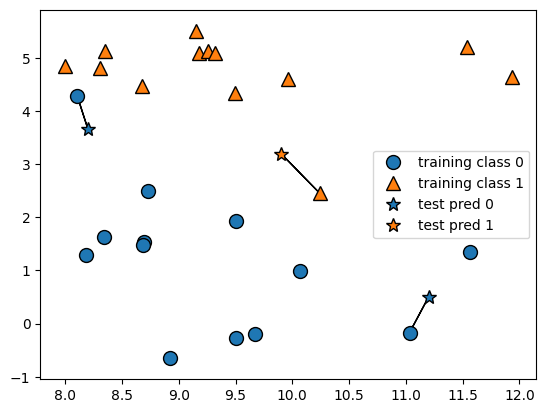

In [23]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

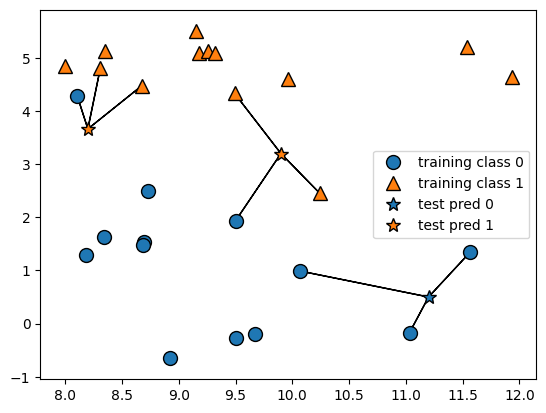

In [24]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

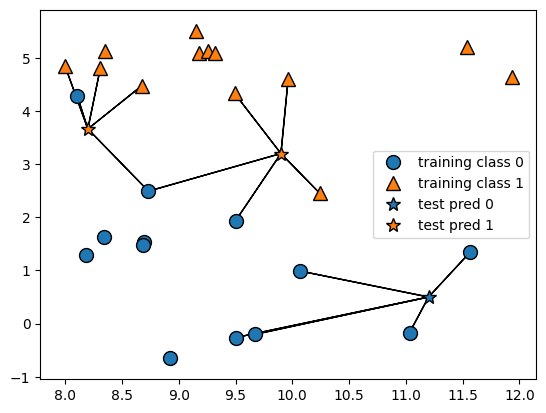

In [25]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

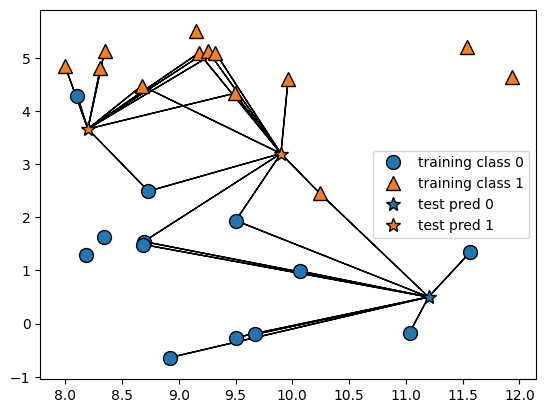

In [26]:
mglearn.plots.plot_knn_classification(n_neighbors=10)

In [17]:
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("test prediction:", clf.predict(X_test))
print("test accuracy:", clf.score(X_test, y_test))

test prediction: [1 0 1 0 1 0 0]
test accuracy: 0.8571428571428571


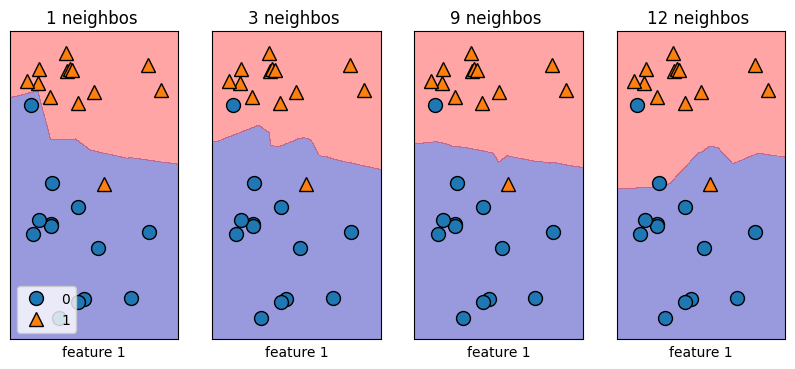

In [23]:
fig, axes = plt.subplots(1, 4, figsize=(10,4))
for n_neighbors, ax in zip([1,3,9,12], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title("{} neighbos ".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_xlabel("feature 1")

axes[0].legend(loc=3)


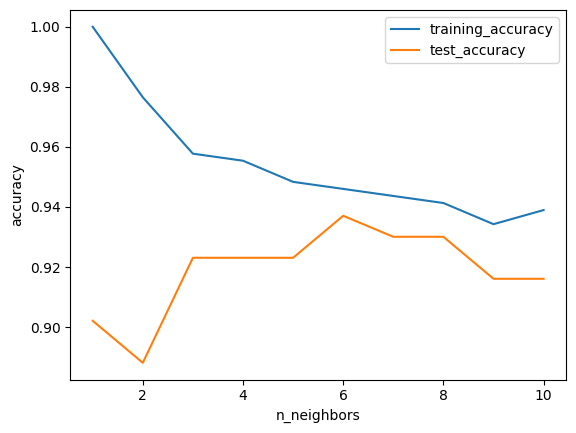

In [24]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_setting = range(1,11)
for n_neighbors in neighbors_setting:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_setting, training_accuracy, label="training_accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test_accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()